In [1]:
from read_input import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
set_scenario_files("scenario3", "set1")

sns.set(font_scale=2)
keyslots = get_keyslots()
characters = get_characters()

C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
performance = pd.read_csv("input/performance_daryl.csv", sep=" ", names={"key1", "key2", "time"})
performance = performance[["key1", "key2", "time"]]
p_single, p_bigram = get_probabilities({"formal":1.0, "twitter":0.0, "code":0.0})
p_single_df = pd.DataFrame(columns={"letter", "f"})
p_single_df.loc[:,"letter"] = [l for l, f in p_single.iteritems()]
p_single_df.loc[:,"f"] = [f for l, f in p_single.iteritems()]

p_bigram_df = pd.DataFrame(columns={"letter1", "letter2", "f"})
p_bigram_df.loc[:,"letter1"] = [l1 for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df.loc[:,"letter2"] = [l2 for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df.loc[:,"f"] = [f for (l1,l2), f in p_bigram.iteritems()]
p_bigram_df = p_bigram_df[["letter1", "letter2", "f"]]
#p_bigram_df = p_bigram_df[(p_bigram_df.letter1.isin(characters)) | (p_bigram_df.letter2.isin(characters))]

weighting corpora
weighting corpora
weighting corpora


In [6]:

def group(key1,key2=""):
    keyslots=get_keyslots()
    if key1 in keyslots:
        parts =  key1.split("_")
        if len(parts)>1:
            return "_".join(parts[1:])
        else:
            return "Normal"
    else:
        parts =  key2.split("_")
        if len(parts)>1:
            return "_".join(parts[1:])
        else:
            return "Normal"
        
performance.loc[:,"Group"] = performance.apply(lambda row: group(row.key1, row.key2), axis=1)
performance.loc[:,"Fst"] = performance.key1.apply(lambda x: x in keyslots)

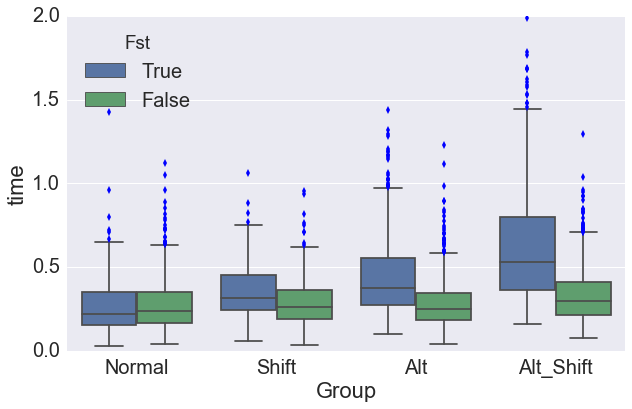

In [20]:
fig,ax = plt.subplots(1)
fig.set_size_inches(10,6)
sns.boxplot(x = "Group", y="time", hue="Fst", data = performance, ax=ax)

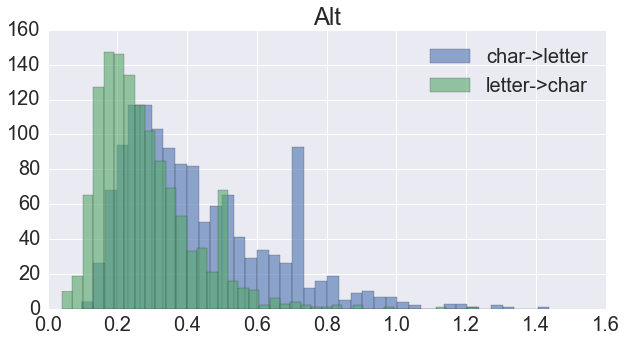

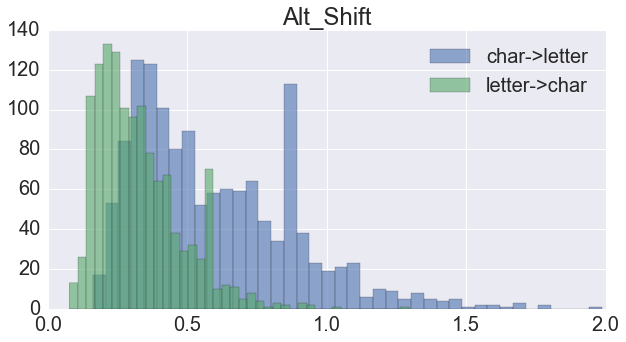

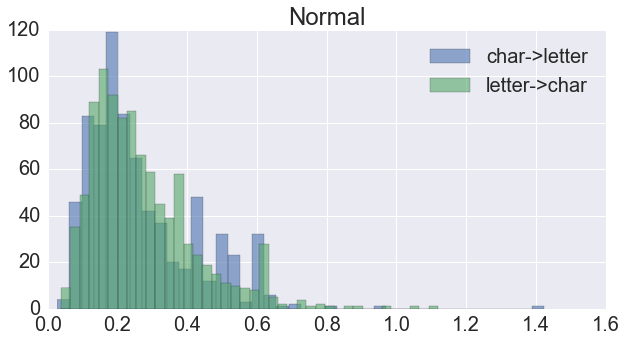

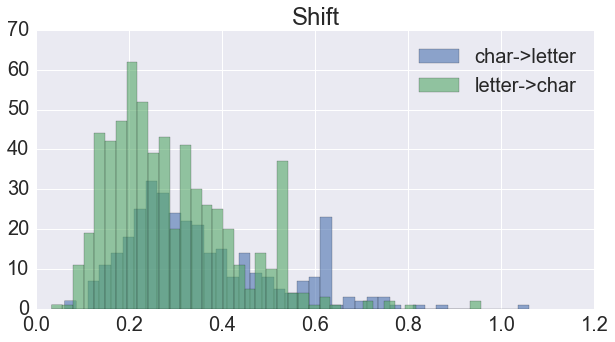

In [15]:

#plt.legend(["Normal", "Shift", "Alt", "Alt_Shift"])
#df = performance[performance.Fst==False]
for g, g_data in performance.groupby('Group'):
    fig,ax = plt.subplots(1)
    fig.set_size_inches(10,5)
    g_data[g_data.Fst==True].time.hist(bins=40,ax=ax,alpha=0.6)
    g_data[g_data.Fst==False].time.hist(bins=40,ax=ax,alpha=0.6)
    ax.legend(["char->letter", "letter->char"])
    #ax.set_xlim(0,4.0)
    plt.title(g)


In [7]:
performance[(performance.key1=="B07") | (performance.key2 == "B07")]

,key1,key2,time,Group,Fst
50,E00,B07,0.415394,Normal,True
51,B07,E00,0.320208,Normal,True
104,E01,B07,0.474976,Normal,True
105,B07,E01,0.264519,Normal,True
158,E02,B07,0.247535,Normal,True
159,B07,E02,0.222141,Normal,True
212,E03,B07,0.415394,Normal,True
213,B07,E03,0.169830,Normal,True
266,E04,B07,0.415394,Normal,True
267,B07,E04,0.224447,Normal,True


In [15]:
p_bigram["e", "t"]

0.0062731120214285846

In [17]:
p_bigram_df[p_bigram_df.letter1 == "e"].sort_values(by="f", ascending=False)

,letter1,letter2,f
7751,e,space,3.669172e-02
19050,e,s,1.958960e-02
19715,e,n,1.414977e-02
25960,e,r,8.065771e-03
3935,e,t,6.273112e-03
16874,e,m,4.656630e-03
15606,e,u,4.264497e-03
5189,e,l,3.161274e-03
20160,e,c,2.244834e-03
18481,e,",",2.066560e-03


In [27]:
p_single_df[["letter", "f"]].sort_values(by="f", ascending=False)

,letter,f
51,space,1.640729e-01
173,e,1.097858e-01
86,s,6.139422e-02
175,i,5.758391e-02
170,a,5.744307e-02
125,n,5.720767e-02
41,t,5.457825e-02
126,r,5.238215e-02
83,o,4.499570e-02
179,u,4.184009e-02


In [28]:
new_p_single_df = pd.DataFrame(columns={"letter", "f"})
for l in p_single.keys():
    new_p_single_df.loc[len(new_p_single_df), :] = [l,p_single_df[p_single_df.letter==l].f.sum()]
new_p_single_df[["letter", "f"]].sort_values(by="f", ascending=False)    

,letter,f
51,space,0.164073
173,e,0.109786
86,s,0.0613942
175,i,0.0575839
170,a,0.0574431
125,n,0.0572077
41,t,0.0545782
126,r,0.0523822
83,o,0.0449957
179,u,0.0418401


In [24]:
new_p_single_df

,letter,f
